In [ ]:
!pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from ucimlrepo import fetch_ucirepo

## Classification :: Predict whether annual income of an individual exceeds $50K/yr based on census data

In [2]:
adult = fetch_ucirepo(name='Adult') 

In [3]:
print(adult.metadata.get('additional_info').get('variable_info'))

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: Unite

In [4]:
# variable information 
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [5]:
df_adult = pd.concat([adult.data['features'], adult.data['targets']], axis=1)

In [6]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
df_adult['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

<Axes: xlabel='income_bool', ylabel='race_and_gender'>

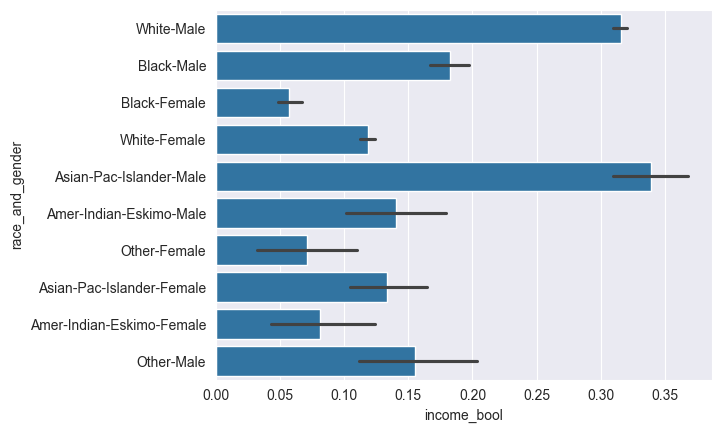

In [52]:
sns.barplot(
    data=df_adult.assign(race_and_gender=lambda fr: fr['race'] + '-' + fr['sex']), 
    x='income_bool',
    y='race_and_gender'
)

In [7]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [16]:
df_adult['income'].map(lambda i: i.replace('.', '')).value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [25]:
df_adult.loc[:, 'income_bool'] = \
(df_adult['income']
    .map(lambda i: 1 if i.replace('.', '') == '>50K' else 0)
)

In [49]:
list_valid_occupations = \
(df_adult['occupation']
    .fillna('MISSING')
    .value_counts(normalize=True)
    .round(2)
    .cumsum()
    .where(lambda i: i < 0.90)
    .dropna()
    .index
    .tolist()
)

df_adult.loc[:, 'occupation_v2'] = [
    occ if occ in list_valid_occupations else 'OTHER_OCCUPATION'
    for occ
    in df_adult['occupation']
]

df_adult.loc[:, 'occupation_v2'].value_counts(normalize=True)

occupation_v2
Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
OTHER_OCCUPATION     0.105278
Other-service        0.100794
Machine-op-inspct    0.061873
Transport-moving     0.048217
Handlers-cleaners    0.042423
?                    0.037734
Name: proportion, dtype: float64

In [37]:
(df_adult['native-country']
    .map(lambda i: 'US' if i == 'United-States' else 'not-US' )
    .value_counts(normalize=True)
)

native-country
US        0.897424
not-US    0.102576
Name: proportion, dtype: float64

<Axes: xlabel='income_bool', ylabel='workclass'>

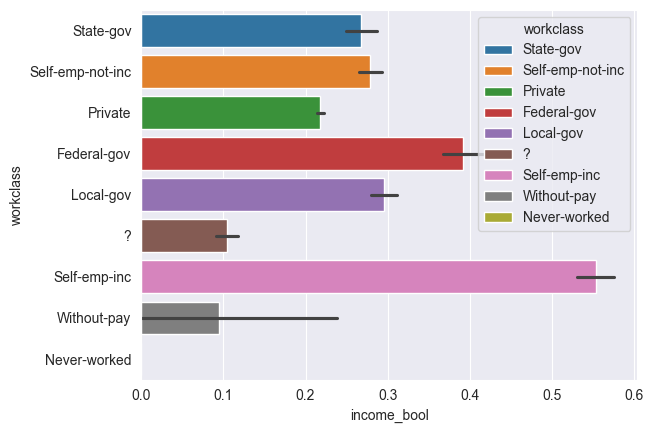

In [26]:
sns.barplot(
    data=df_adult,
    x='income_bool',
    y='workclass',
    hue='workclass'
)

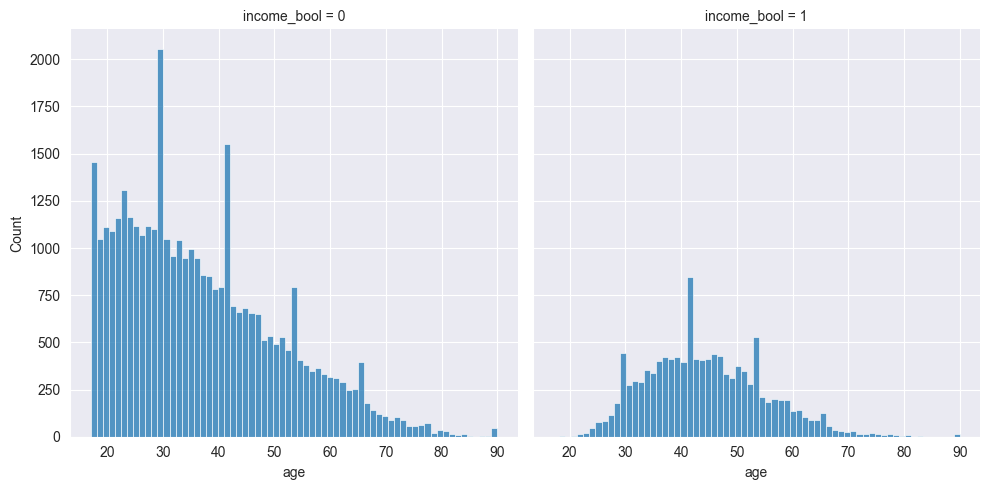

In [31]:
sns.displot(data=df_adult, x='age', col='income_bool')

# ML input

In [57]:
df_X = df_adult.loc[:, :'native-country']

In [103]:
df_dummies = pd.concat([
    pd.get_dummies(df_adult.loc[:, col], prefix=col).astype(int)
    for col 
    in df_X.select_dtypes(include=pd.Categorical).columns.tolist()
], axis=1)

list_drop_lt_5pc_data = \
(df_dummies
    .mean()
    .sort_values()
    .where(lambda i: i > 0.05)
    .dropna()
    .index
    .tolist())

df_dummies.drop(columns=list_drop_lt_5pc_data, inplace=True)

In [104]:
len(list_drop_lt_5pc_data)

26

In [94]:
df_numeric = \
(df_X
    .select_dtypes(exclude=pd.Categorical)
 .drop(columns=['fnlwgt', 'education-num'])
 .apply(lambda col: col.clip(upper=col.quantile(0.99)))
 .apply(lambda col: col.subtract(col.mean()).divide(col.std()))
)

In [79]:
X = pd.concat([df_numeric, df_dummies], axis=1)

In [82]:
y = df_adult['y']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=1234)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
from mdxclf.visualize import plot_confusion_matrix

In [113]:
gscv_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': [8, 16, 24],
    },
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=True
)

In [114]:
gscv_tree.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [8, 16, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [115]:
y_predicted = gscv_tree.predict(X_test)

In [116]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      7384
         1.0       0.95      0.29      0.45      2385

    accuracy                           0.82      9769
   macro avg       0.88      0.64      0.67      9769
weighted avg       0.85      0.82      0.79      9769



Normalized confusion matrix


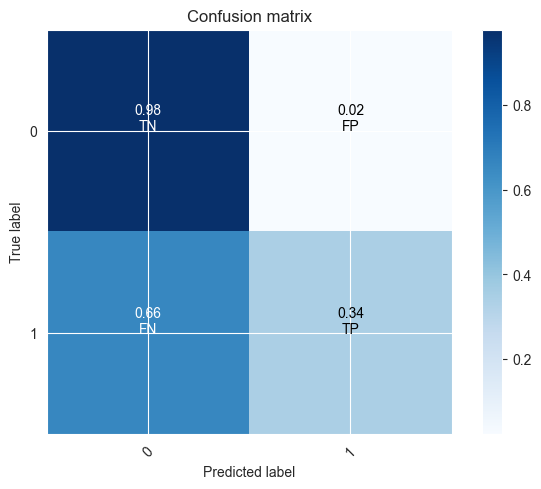

In [110]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_predicted), 
                      classes=[0, 1], 
                      normalize=True)